# Data Exploration imdb-genres

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [3]:
df1 = pd.read_csv('./data/data-raw/imdb_movies_genres.csv', delimiter='\t')
doc_num = len(df1)

print('Number of plots: {}'.format(doc_num))
df1.head()

Number of plots: 117352


,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Number of comments, celectivity vs categories
Selectivity - the proportion of documents to which category(predicate) applies.

Text(0.5,0,'Categories')

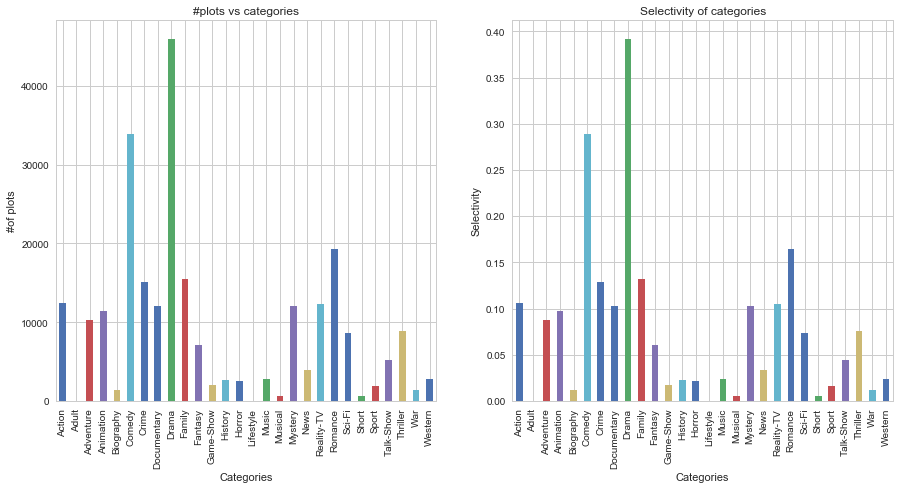

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df1[df1.columns[2:]].sum().plot.bar(ax=axes[0], title='#plots vs categories')
axes[0].set_ylabel('#of plots')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df1[df1.columns[2:]].sum() / doc_num
s.plot.bar(ax=axes[1], title='Selectivity of categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')

## Find comments that match N categories at the same time

In [8]:
categories = df1.columns[2:]
category_docs = {}
for c in categories:
    category_docs[c] = set(df1['title'].loc[df1[c] == 1].values)
    
num_categories = len(categories)
two_categories_docs = np.zeros((num_categories, num_categories))
for ind_c1, c1 in enumerate(categories):
    for ind_c2, c2 in enumerate(categories):
        two_categories_docs[ind_c1, ind_c2] = len(category_docs[c1] & category_docs[c2])    

### Plot heatmap for 2 categories

In [9]:
df2 = pd.DataFrame(two_categories_docs, index=categories, columns=categories)

# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.01, ax=ax)

### Bar chart of number, proportion of abstracts  that describe 2 categories

In [10]:
df3= df2.unstack().sort_values(ascending=False).drop_duplicates()
indexes2 = df3.index.values.tolist()
indexes2_unique = []
for i in indexes2:
    if i[0] != i[1]:
        indexes2_unique.append(i)

Text(0.5,0,'Categories')

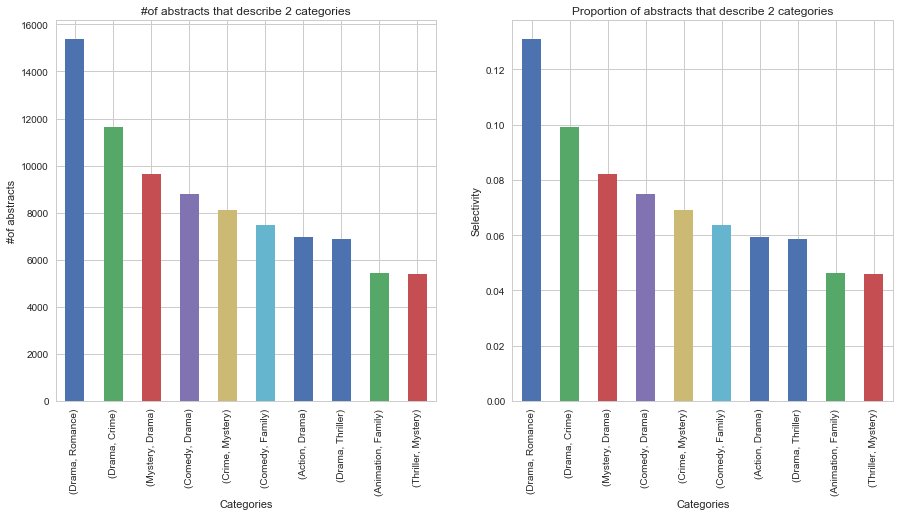

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df3.loc[indexes2_unique][:10].plot.bar(ax=axes[0], title='#of abstracts that describe 2 categories')
axes[0].set_ylabel('#of abstracts')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df3.loc[indexes2_unique][:10] / doc_num
s.plot.bar(ax=axes[1], title='Proportion of abstracts that describe 2 categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')


### Bar chart of number of documents  that describe 3 categories

In [12]:
indexes3_unrolled = set()
for i in indexes2_unique:    
    indexes3_unrolled.add(i[0])
    indexes3_unrolled.add(i[1])

import itertools
indexes3 = list(itertools.combinations(indexes3_unrolled, 3))
three_categories_docs = []
for c1, c2, c3 in indexes3:
    three_categories_docs.append(len(category_docs[c1] & category_docs[c2] & category_docs[c3]))

Text(0.5,1,'#of abstracts that describe 3 categories')

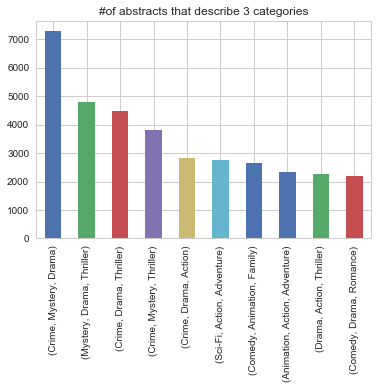

In [13]:
pd.Series(three_categories_docs, indexes3).sort_values(ascending=False)[:10].plot.bar().set_title('#of abstracts that describe 3 categories')

In [15]:
print('Selectivity of  Crime^Mystery^Drama = {}'.format(7279/117352))

Selectivity of  Crime^Mystery^Drama = 0.062027063876201514
